# Noms :  
# **Valentin Six** 
# **Théo Niemann**

# Exercice 1:

In [145]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy

### Question 1:

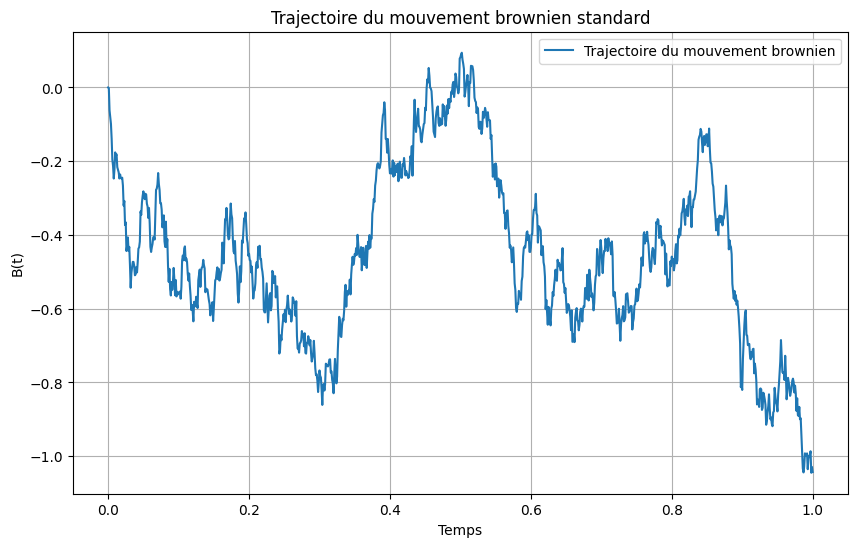

In [146]:
def bm(T, n_steps=1000):
    
    dt = T / n_steps
    t = np.linspace(0, T, n_steps+1)
    dB = np.random.normal(0, np.sqrt(dt), n_steps)
    B = np.concatenate(([0], np.cumsum(dB)))
    

    plt.figure(figsize=(10, 6))
    plt.plot(t, B, label="Trajectoire du mouvement brownien")
    plt.xlabel('Temps')
    plt.ylabel('B(t)')
    plt.title('Trajectoire du mouvement brownien standard')
    plt.legend()
    plt.grid(True)
    plt.show()

bm(T=1, n_steps=1000)


### Question 2:

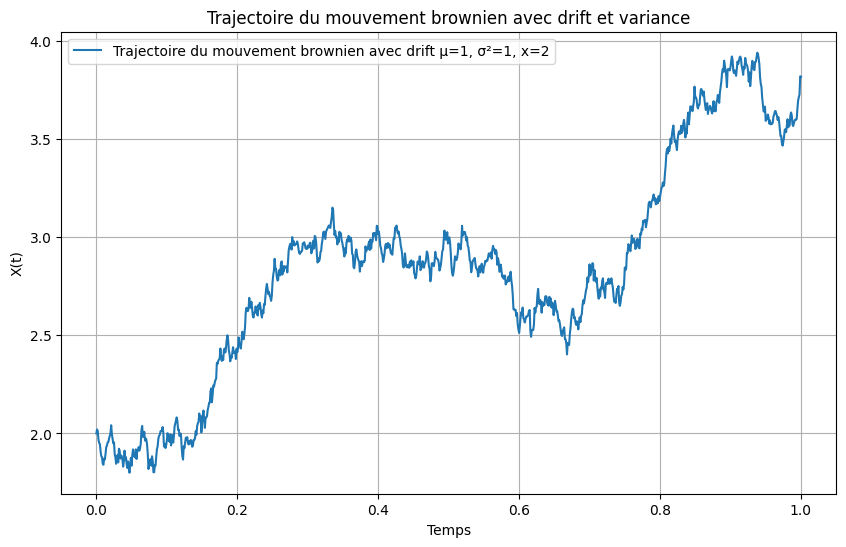

In [147]:
def bm_drift(T, mu=0, sigma=1, x=0, n_steps=1000):
    
    dt = T / n_steps
    t = np.linspace(0, T, n_steps+1)
    dB = np.random.normal(mu*dt, sigma*np.sqrt(dt), n_steps)
    B = x + np.concatenate(([0], np.cumsum(dB)))
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(t, B, label=f"Trajectoire du mouvement brownien avec drift μ={mu}, σ²={sigma**2}, x={x}")
    plt.xlabel('Temps')
    plt.ylabel('X(t)')
    plt.title('Trajectoire du mouvement brownien avec drift et variance')
    plt.legend()
    plt.grid(True)
    plt.show()

bm_drift(T=1, mu=1, sigma=1, x=2, n_steps=1000)


### Question 3:

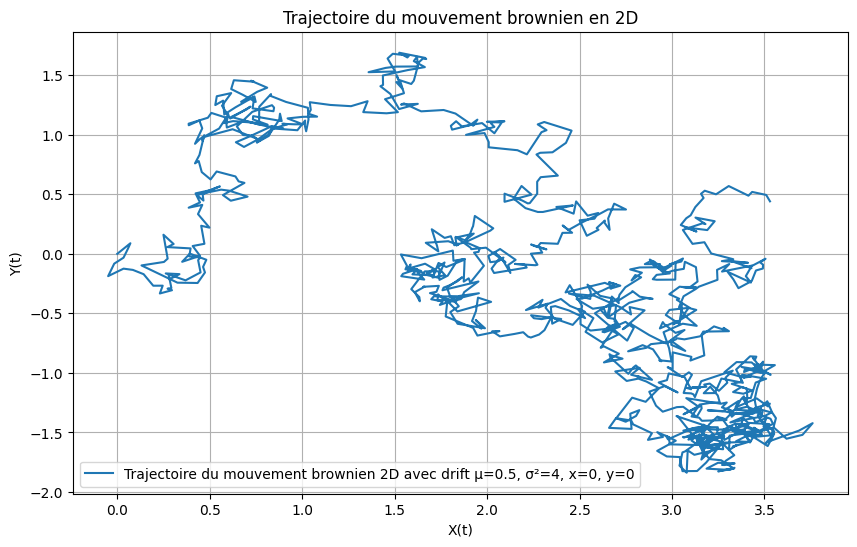

In [148]:
def two_dimensional_bm(T, mu=0, sigma=1, x=0, y=0, n_steps=1000):
   
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    dB1 = np.random.normal(mu*dt, sigma*np.sqrt(dt), n_steps)
    dB2 = np.random.normal(mu*dt, sigma*np.sqrt(dt), n_steps)
    B1 = x + np.concatenate(([0], np.cumsum(dB1)))
    B2 = y + np.concatenate(([0], np.cumsum(dB2)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(B1, B2, label=f"Trajectoire du mouvement brownien 2D avec drift μ={mu}, σ²={sigma**2}, x={x}, y={y}")
    plt.xlabel('X(t)')
    plt.ylabel('Y(t)')
    plt.title('Trajectoire du mouvement brownien en 2D')
    plt.legend()
    plt.grid(True)
    plt.show()

two_dimensional_bm(T=1, mu=0.5, sigma=2, x=0, y=0, n_steps=1000)

### Question 4:

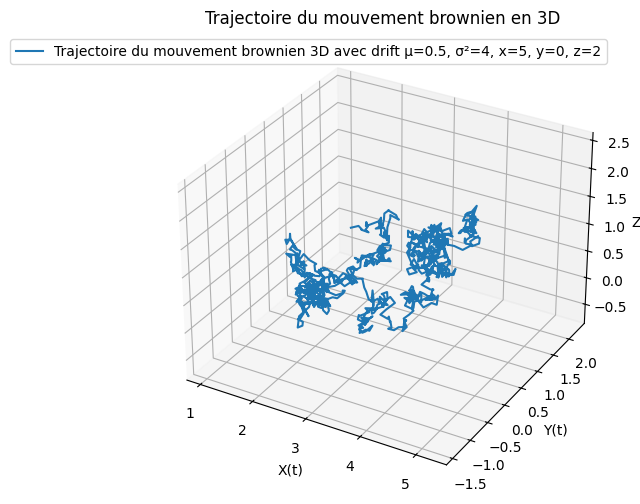

In [149]:
def three_dimensional_bm(T, mu=0, sigma=1, x=0, y=0,z=0, n_steps=1000):
   
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    dB1 = np.random.normal(mu*dt, sigma*np.sqrt(dt), n_steps)
    dB2 = np.random.normal(mu*dt, sigma*np.sqrt(dt), n_steps)
    dB3 = np.random.normal(mu*dt, sigma*np.sqrt(dt), n_steps)
    B1 = x + np.concatenate(([0], np.cumsum(dB1)))
    B2 = y + np.concatenate(([0], np.cumsum(dB2)))
    B3 = z +  np.concatenate(([0], np.cumsum(dB3)))
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(B1, B2, B3, label=f"Trajectoire du mouvement brownien 3D avec drift μ={mu}, σ²={sigma**2}, x={x}, y={y}, z={z}")
    ax.set_xlabel('X(t)')
    ax.set_ylabel('Y(t)')
    ax.set_zlabel('Z(t)')
    plt.title('Trajectoire du mouvement brownien en 3D')
    plt.legend()
    plt.grid(True)
    plt.show()

three_dimensional_bm(T=1, mu=0.5, sigma=2, x=5,y=0, z=2, n_steps=1000)

# Exercice 2:

### Question 1:

In [150]:
def monte_carlo_reflection(T, a, n_steps=1000, n_simulations=10000):
    
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    
    max_B = np.zeros(n_simulations)
    B_t = np.zeros(n_simulations)
    
    for i in range(n_simulations):
        dB = np.random.normal(0, np.sqrt(dt), n_steps)
        B = np.concatenate(([0], np.cumsum(dB)))
        max_B[i] = np.max(B)
        B_t[i] = B[-1]
    
    P_sup = np.mean(max_B >= a)
    P_Bt = np.mean(B_t >= a)
    P_abs_Bt = np.mean(np.abs(B_t) >= a)

    print(f"P(sup B_s >= {a}) = {P_sup}")
    print(f"2P(B_t >= {a}) = {2 * P_Bt}")
    print(f"P(|B_t| >= {a}) = {P_abs_Bt}")

b=6
for i in range(1, b):
    monte_carlo_reflection(T=1, a=i, n_steps=1000, n_simulations=10000)
    print("\n")



P(sup B_s >= 1) = 0.3017
2P(B_t >= 1) = 0.3006
P(|B_t| >= 1) = 0.309


P(sup B_s >= 2) = 0.0428
2P(B_t >= 2) = 0.0436
P(|B_t| >= 2) = 0.046


P(sup B_s >= 3) = 0.0022
2P(B_t >= 3) = 0.0018
P(|B_t| >= 3) = 0.0018


P(sup B_s >= 4) = 0.0
2P(B_t >= 4) = 0.0
P(|B_t| >= 4) = 0.0


P(sup B_s >= 5) = 0.0
2P(B_t >= 5) = 0.0
P(|B_t| >= 5) = 0.0




On remarque que les probabiltés qui illustrent le principe de réflexion du mouvement brownien sont assez proches, en ayant réalisé 10,000 simulations. Cela montre bien que le principe de réflexion est vérifié.

### Question 2:

/var/folders/wy/7nm2pvj972sb9zgtnh3p7k0w0000gn/T/ipykernel_6189/3538898878.py:21: RuntimeWarning: divide by zero encountered in divide
  f_x = 1 / (np.pi * np.sqrt(x * (1 - x)))


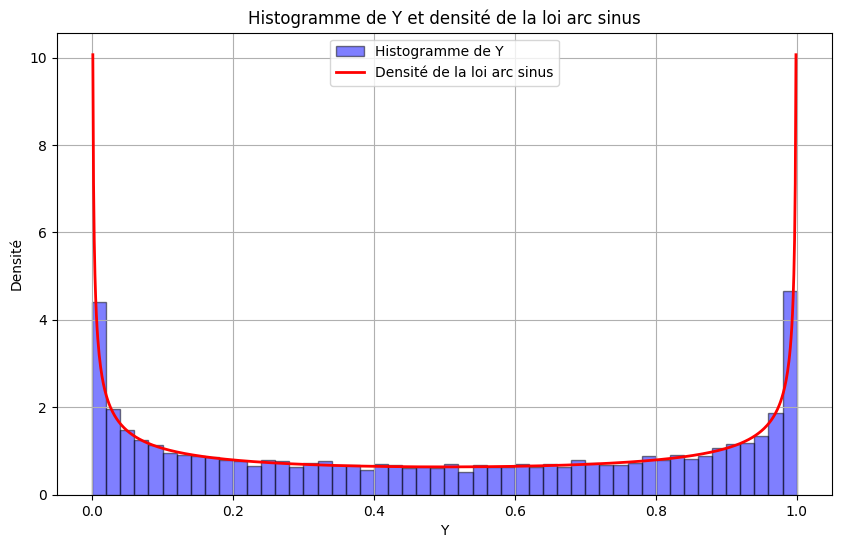

In [151]:
def create_bm(T, n_steps):
    
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    dB = np.random.normal(0, np.sqrt(dt), n_steps)
    B = np.concatenate(([0], np.cumsum(dB)))
    return t, B

def generate_Y_samples(T, n_steps, K):
    Y_samples = np.zeros(K)
    for i in range(K):
        t, B = create_bm(T, n_steps)
        Y_samples[i] = t[np.argmax(B)]
    return Y_samples

def plot_histogram_and_arcsine_density(Y_samples, bins=50):
    
    plt.figure(figsize=(10, 6))
    count, bins, ignored = plt.hist(Y_samples, bins=bins, density=True, alpha=0.5, color='b', edgecolor='black', label='Histogramme de Y')
    x = np.linspace(0, 1, 1000)
    f_x = 1 / (np.pi * np.sqrt(x * (1 - x)))
    
    plt.plot(x, f_x, 'r', lw=2, label='Densité de la loi arc sinus')
    plt.xlabel('Y')
    plt.ylabel('Densité')
    plt.title('Histogramme de Y et densité de la loi arc sinus')
    plt.legend()
    plt.grid(True)
    plt.show()

T = 1
n_steps = 1000
K = 10000

Y_samples = generate_Y_samples(T, n_steps, K)

plot_histogram_and_arcsine_density(Y_samples)


On remarque que pour le K-échantillon de Y, l'histogramme correspond quasiment à la densité de la loi arcsinus (tracée en rouge sur le graphe), ce qui laisse supposer que la distribution de Y est la même que la loi de arcsinus.

### Question 3:

In [152]:
def gamblers_ruin_bm(T, a, b, n_steps=1000):
    count_b=0
    count_a=0
    for i in range(100):
        dt = T / n_steps
        t = np.linspace(0, T, n_steps + 1)
        dB = np.random.normal(0, np.sqrt(dt), n_steps)
        B = np.concatenate(([0], np.cumsum(dB)))
        ruin_a = np.argmax((B <= -a))
        ruin_b = np.argmax((B >= b))
        if ruin_a < ruin_b:
            ruin = ruin_b
            count_b +=1
        else:
            ruin=ruin_a
            count_a +=1

            
    return(f"Probabilité estiméeT= T_b: {count_a/(count_a+count_b)}",f"Probabilité théorique T= T_b: {a/(a+b)}")

gamblers_ruin_bm(T=1, a=0.5, b=0.5)

('Probabilité estiméeT= T_b: 0.57', 'Probabilité théorique T= T_b: 0.5')

# Exercice 3:

### Question 1:

On reprend une fonction que l'on avait déjà codé dans le TP précédent (marche aléatoire).

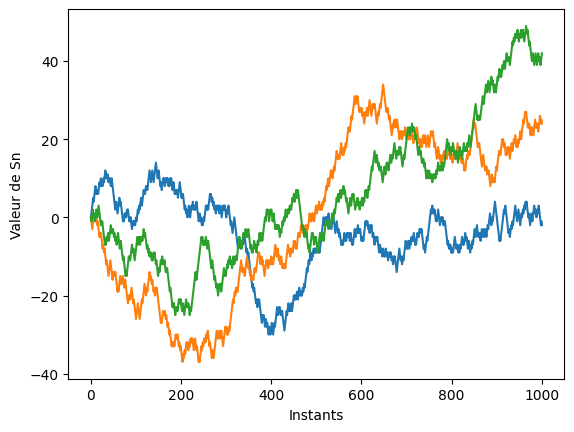

In [153]:
def simulate_Sn(nb_simu,N=1000):
    for i in range(nb_simu):
        x=0
        traj = [x]
        for j in range(N):
            rad = 2*np.random.binomial(1, 0.5)-1
            x += rad
            traj.append(x)
        plt.plot(range(N+1), traj)
    plt.xlabel('Instants')
    plt.ylabel('Valeur de Sn')
    plt.show()
simulate_Sn(3)

### Question 2:

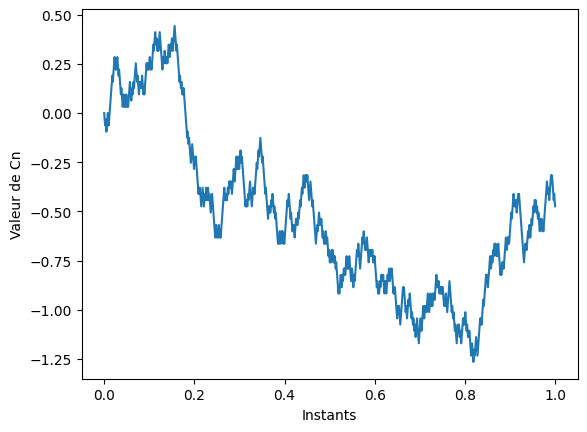

In [154]:
def create_Sn(N=10):
    x=[0]
    for j in range(N-1):
        rad = 2*np.random.binomial(1, 0.5)-1
        x += [x[-1]+rad]
    return x

def illustrate_donsker_theorem(N):
    t = np.linspace(0, 1, N)
    Cn = create_Sn(N)/np.sqrt(N)
    plt.plot(t,Cn)
    plt.xlabel('Instants')
    plt.ylabel('Valeur de Cn')
    plt.show()
illustrate_donsker_theorem(1000)


On remarque bien que lorsque N est grand, notre trajectoire C_n converge en loi vers un brownien standard.

# Exercice 4:

### Question 1:

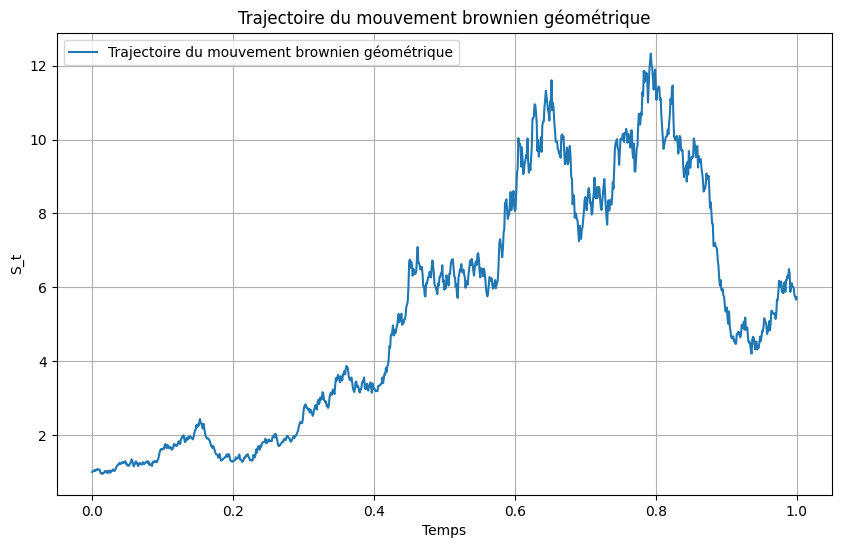

In [155]:
def geometric_bm(T, mu, sigma,n_steps=1000):
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    dB = np.random.normal(0, np.sqrt(dt), n_steps)
    B = np.concatenate(([0], np.cumsum(dB)))
    S_t =np.exp(mu*t-(sigma**2)*t/2 + sigma*B)
    plt.figure(figsize=(10, 6))
    plt.plot(t, S_t, label="Trajectoire du mouvement brownien géométrique")
    plt.xlabel('Temps')
    plt.ylabel('S_t')
    plt.title('Trajectoire du mouvement brownien géométrique')
    plt.legend()
    plt.grid(True)
    plt.show()

geometric_bm(T=1, mu=2, sigma=1)

### Question 2:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


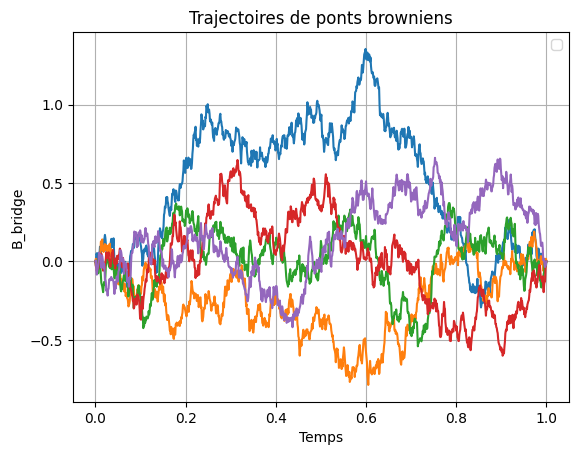

In [156]:
def brownian_bridge(T, nb_simu=5,n_steps=1000):
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    for i in range(nb_simu):
        dB = np.random.normal(0, np.sqrt(dt), n_steps)
        B = np.concatenate(([0], np.cumsum(dB)))
        B_t = B[-1]
        B_bridge = B - (t / T) * B[-1]
        plt.plot(t, B_bridge)
    plt.xlabel('Temps')
    plt.ylabel('B_bridge')
    plt.title('Trajectoires de ponts browniens')
    plt.legend()
    plt.grid(True)
    plt.show()
brownian_bridge(T=1)

On voit bien que le processus commence à 0 et se termine à 0: on bien un pont brownien.

### Question 3:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


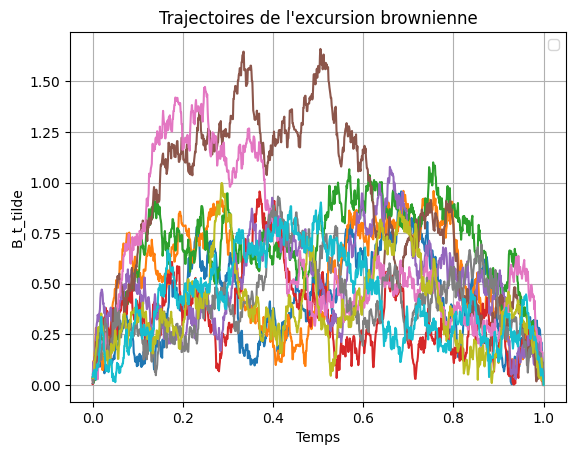

In [157]:
def brownian_excursion(T, nb_simu=10, n_steps=1000):
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    
    for _ in range(nb_simu):
        B_excursion = []
        dB = np.random.normal(0, np.sqrt(dt), n_steps)
        B = np.concatenate(([0], np.cumsum(dB)))
        B_bridge = B - (t / T) * B[-1]
        
        T_index = np.argmin(B_bridge)
        T_time = T_index * dt  # Convert index back to time
        
        for time in t-1:
            if 0 <= time <= 1 - T_time:
                B_excursion.append(B_bridge[int(time / dt) + T_index] - B_bridge[T_index])
            else:
                B_excursion.append(B_bridge[int((time + T - 1) / dt) + T_index] - B_bridge[T_index])
        
        plt.plot(t, B_excursion)
    
    plt.xlabel('Temps')
    plt.ylabel('B_t_tilde')
    plt.title("Trajectoires de l'excursion brownienne")
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemple d'utilisation
brownian_excursion(T=1)


Ce sont bien des ponts browniens qui restent positifs.